# Ingenia Data Analysis (2022 - 2023)

In order to determine how the trends found last year have affected--and possibly improved the company's performance, it's critical to analyze the current performance.

## General stats

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('STATUS ASIGNACIÓN INDRA_GENERAL (HANSSEL)_2023.csv', encoding = 'latin-1', )
df

,YEAR,MONTH,QUARTER,SITE,TYPE,DESCRIPTION,LOCATION,ANALYST,REQUEST_DATE,SENDING_STATUS,DATE,APPROVAL_STATUS,APPROVAL_DATE,EXECUTION_STATUS,REPORT_DATE,START_DATE,END_DATE,QUOTATION
0,2023,ENERO,Q1,SATÉLITE,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ANCASH,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,3565.09
1,2023,ENERO,Q1,CARAZ,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ANCASH,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,4011.13
2,2023,ENERO,Q1,VELASCO ASTETE,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE ARRIOS...,CUSCO,VARGAS,1-Jan,ENVIADA,1-Jan,APROBADA,27-Jan,EJECUTADO,20-Feb,9-Feb,9-Feb,2472.94
3,2023,ENERO,Q1,AMBO,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,AMBO,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,4011.13
4,2023,ENERO,Q1,AEROPISCO,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ICA,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,2827.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2022,DICIEMBRE,Q4,SAN BORJA,INFRA,1. SUMINISTRO E INSTALACIÓN DE CANDADO Y CADEN...,LIMA,ORTEGA,21-Dec,ENVIADA,21-Dec,APROBADA,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,203.62
373,2022,DICIEMBRE,Q4,PICSI,INFRA,1. CAMBIO DE BISAGRAS.,LIMA,ORTEGA,22-Dec,ENVIADA,22-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,805.95
374,2022,DICIEMBRE,Q4,COCHERA MEDIA NETWORKS,INFRA,1. ENCUADRE DE PORTÓN DE INGRESO VEHICULAR.,LIMA,MARTÍNEZ,22-Dec,ENVIADA,23-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,916.42
375,2022,DICIEMBRE,Q4,NUEVA CAÑ,INFRA,1. LIMPIEZA Y FUMIGACIÓN DE SALA DE EQUIPOS.\n...,LIMA,ORTEGA,26-Dec,ENVIADA,26-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,1688.09


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              377 non-null    int64 
 1   MONTH             377 non-null    object
 2   QUARTER           377 non-null    object
 3   SITE              377 non-null    object
 4   TYPE              377 non-null    object
 5   DESCRIPTION       377 non-null    object
 6   LOCATION          377 non-null    object
 7   ANALYST           377 non-null    object
 8   REQUEST_DATE      377 non-null    object
 9   SENDING_STATUS    377 non-null    object
 10  DATE              377 non-null    object
 11  APPROVAL_STATUS   377 non-null    object
 12  APPROVAL_DATE     377 non-null    object
 13  EXECUTION_STATUS  377 non-null    object
 14  REPORT_DATE       110 non-null    object
 15  START_DATE        113 non-null    object
 16  END_DATE          113 non-null    object
 17  QUOTATION       

In [87]:
df.shape

(377, 18)

In [88]:
df.describe()

,YEAR
count,377.000000
mean,2022.169761
std,0.375922
min,2022.000000
25%,2022.000000
50%,2022.000000
75%,2022.000000
max,2023.000000


#### Transforming "QUOTATION" values into numeric values

In [89]:
df['QUOTATION'] = pd.to_numeric(df['QUOTATION'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

In [90]:
df['QUOTATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 377 entries, 0 to 376
Series name: QUOTATION
Non-Null Count  Dtype  
--------------  -----  
377 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [91]:
df.loc[(df['YEAR'] == 2023) & (df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].sum()

75852.26

Total 2023 revenue, so far.

In [92]:
df.loc[(df['YEAR'] == 2023) & (df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].groupby(df['TYPE']).sum().to_frame()

,QUOTATION
TYPE,
INFRA,13641.65
TORRE,62210.61


Tower (TORRE) related services have brought much more revenue than Infrastructure (INFRA) related ones, so far.

## Comparison between 2022 and 2023 data

In [93]:
revenue_per_year = df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby(df['YEAR'])
revenue_per_year.agg(['sum', 'count'])

,sum,count
YEAR,,
2022,347963.56,108
2023,75852.26,17


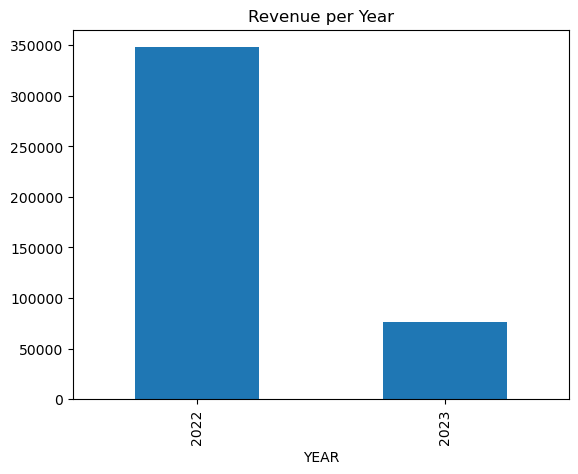

In [94]:
revenue_per_year.sum().plot(kind='bar')
plt.title('Revenue per Year')
plt.show()

2023's revenue has reached a 20% of 2022's total revenue.

In [95]:
revenue_per_type_year = df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['TYPE']]).sum().to_frame()
revenue_per_type_year

QUOTATION
YEAR TYPE            
2022 INFRA  209121.78
     TORRE  138841.78
2023 INFRA   13641.65
     TORRE   62210.61

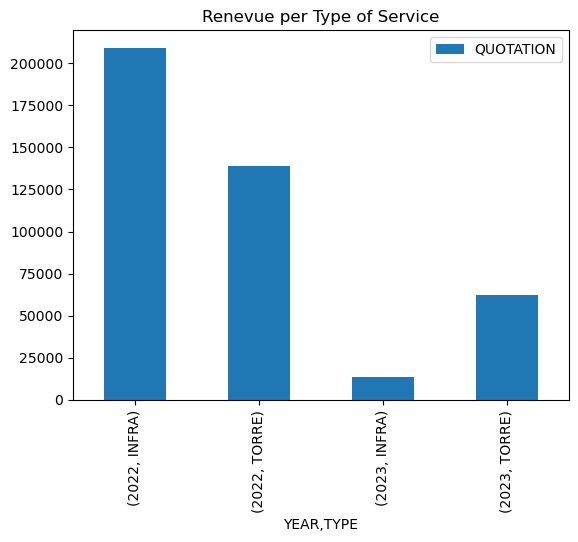

In [96]:
revenue_per_type_year.plot(kind='bar')
plt.title('Renevue per Type of Service')
plt.show()

Tower services represent 80%+ of 2023's overall revenue.

In [97]:
df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['QUARTER']]).sum().to_frame()

QUOTATION
YEAR QUARTER           
2022 Q1        34409.23
     Q2       136040.88
     Q3        55571.04
     Q4       121942.41
2023 Q1        75852.26

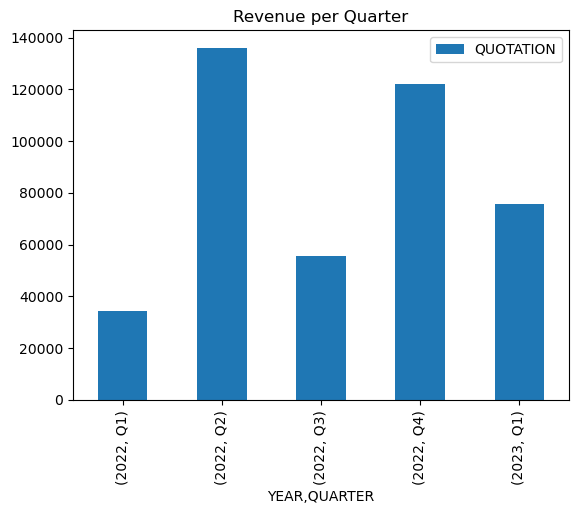

In [98]:
df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['QUARTER']]).sum().to_frame().plot(kind='bar')
plt.title('Revenue per Quarter')
plt.show()

Q1's revenue (Feb 2023) has already overcome 2022 Q1's revenue as well as 2022 Q3's revenue.

## 2023 stats

In [99]:
df.loc[(df['APPROVAL_STATUS'] == 'APROBADA') & (df['YEAR'] == 2023), 'QUOTATION'].groupby(df['ANALYST']).agg(['sum', 'count'])

,sum,count
ANALYST,,
MARTÍNEZ,11191.58,2
ORTEGA,590.14,1
VARGAS,64070.54,14


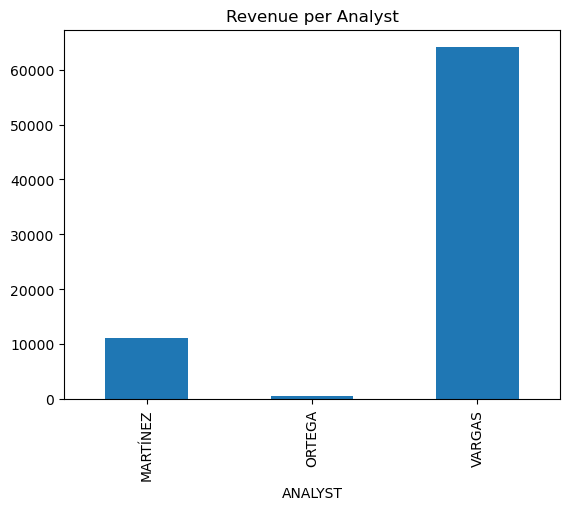

In [100]:
df.loc[(df['APPROVAL_STATUS'] == 'APROBADA') & (df['YEAR'] == 2023), 'QUOTATION'].groupby(df['ANALYST']).sum().plot(kind='bar')
plt.title('Revenue per Analyst')
plt.show()

Vargas has been the most profitable analyst, so far. The incomes generated through him represent 85%+ of 2023's overall revenue.

## Conclusions

1. Since 2023 Q1's revenue has largely overcome 2022 Q1's revenue (2X), it's correct to affirm that the current performance is doing great.

2. 80%+ of 2023's revenue has been produced by the execution of Tower services.

3. 85%+ of 2023's revenue has been produced by the execution of Vargas' approved services, as determined in 2022's Analysis. Given that, the insights found last year have been determinant to predict which Analyst was the top priority.